## EN3150 Assignment 02
## Learning from data and related challenges and classification
### 200500L - Ishara Dilshan


---------------
quection 1

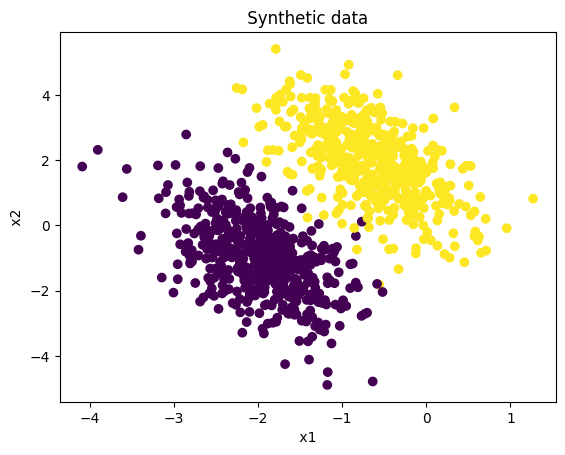

In [22]:
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import make_blobs

# Generate synthetic data
np . random . seed (0)
centers = [[ -5 , 0] , [0 , 1.5]]
X , y = make_blobs ( n_samples =1000 , centers = centers , random_state =40)
transformation = [[0.4 , 0.2] , [ -0.4 , 1.2]]
X = np.dot (X , transformation )

# Add a bias term to the feature matrix
X = np.c_ [ np.ones(( X.shape [0] , 1)) , X ]

# Define the logistic sigmoid function
def sigmoid ( z ) :
    return 1 / (1 + np . exp ( - z ) )

# Define the logistic loss ( binary cross - entropy )   function
def log_loss ( y_true , y_pred ) :
    epsilon = 1e-15
    y_pred = np . clip ( y_pred , epsilon , 1 - epsilon )
    # Clip to avoid log (0)
    return - ( y_true * np.log ( y_pred ) + (1 - y_true ) * np.log(1 - y_pred))


# plot the data
plt . figure ()
plt . scatter ( X [:,1] , X [:,2] , c = y )
plt . title (" Synthetic data ")
plt . xlabel (" x1 ")
plt . ylabel (" x2 ")
plt . show ()



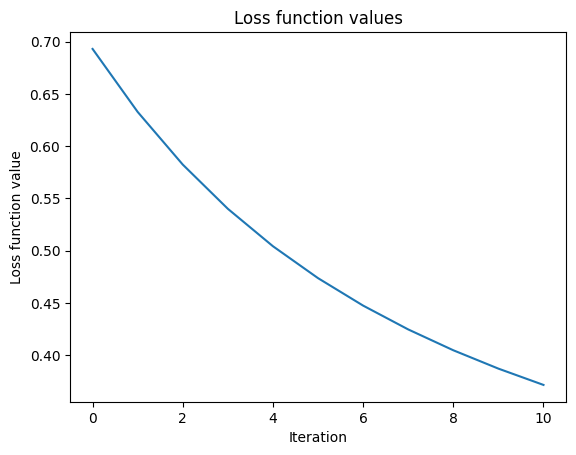

In [25]:
# Define the logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient descent and Newton method parameters
learning_rate = 0.1
iterations = 10
loss_history = []

# Initialize coefficients
weights = np.zeros((X.shape[1], 1))  


num_samples = X.shape[0]
num_features = X.shape[1] - 1  # Subtract 1 for the bias term

# Create arrays for ones and zeros
ones_array = np.ones((num_samples, 1))
gradient_matrix = np.zeros((num_samples, num_samples))

# Initialize cost history list
cost_history = []

# Calculate initial cost and add it to history
initial_cost = 0

for sample_index in range(num_samples):
    # Calculate the loss for each sample
    sample_loss = log_loss(y[sample_index], sigmoid(np.dot(weights.T, X[sample_index, :].reshape(num_features + 1, 1)))).item()
    initial_cost += sample_loss

average_initial_cost = initial_cost / num_samples
cost_history.append(average_initial_cost)

# Gradient descent loop    
for iteration in range(iterations):
    # Update gradient_matrix
    for sample_index in range(num_samples):
        gradient_matrix[sample_index, sample_index] = sigmoid(np.dot(weights.T, X[sample_index, :].reshape(num_features + 1, 1))) - y[sample_index]
    
    # Calculate the gradient
    gradient = (ones_array.T @ gradient_matrix @ X).T / num_samples
    
    # Update the weight vector
    weights = weights - learning_rate * gradient
    
    # Calculate the cost after the weight update
    updated_cost = 0
    for sample_index in range(num_samples):
        # Calculate the loss for each sample
        sample_loss = log_loss(y[sample_index], sigmoid(np.dot(weights.T, X[sample_index, :].reshape(num_features + 1, 1)))).item()
        updated_cost += sample_loss
    
    # Calculate the average updated cost
    average_updated_cost = updated_cost / num_samples
    
    # Add the updated cost to history
    cost_history.append(average_updated_cost)

# Plot the loss function values
plt.figure()
plt.plot(cost_history)
plt.title("Loss function values")
plt.xlabel("Iteration")
plt.ylabel("Loss function value")
plt.show()



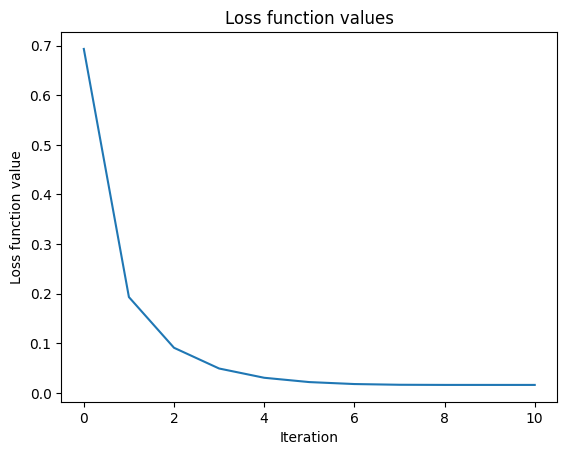

In [27]:
# Initialize coefficients using Newton's method
weights_newton = np.zeros((X.shape[1], 1))  
cost_newton = []

# Create arrays for intermediate calculations
sample_matrix = np.zeros((X.shape[0], X.shape[0]))  
sample_weights = np.zeros((X.shape[0], X.shape[0]))

# Number of samples and features
N = X.shape[0]
D = X.shape[1] - 1  # Subtract 1 for the bias term

ones_array = np.ones((N, 1))

# Calculate initial cost and add it to history for Newton's method
initial_cost_newton = 0
for sample_index in range(N):
    sample_loss = log_loss(y[sample_index], sigmoid(np.dot(weights_newton.T, X[sample_index, :].reshape(D + 1, 1)))).item()
    initial_cost_newton += sample_loss

# Calculate the average initial cost for Newton's method
average_initial_cost_newton = initial_cost_newton / N
cost_newton.append(average_initial_cost_newton)

# Newton's method loop
for iteration in range(iterations):
    for sample_index in range(N):
        sample_matrix[sample_index, sample_index] = sigmoid(np.dot(weights_newton.T, X[sample_index, :].reshape(D + 1, 1))) - y[sample_index]

    gradient_newton = (ones_array.T @ sample_matrix @ X).T / N
    
    # Update sample_weights S
    for sample_index in range(N):
        sample_weights[sample_index, sample_index] = (sigmoid(np.dot(weights_newton.T, X[sample_index, :].reshape(D + 1, 1))) - y[sample_index]) * (1 - sigmoid(np.dot(weights_newton.T, X[sample_index, :].reshape(D + 1, 1))) - y[sample_index])
    
    # Calculate the Hessian matrix
    Hessian = (X.T @ sample_weights @ X) / N
    weights_newton = weights_newton - np.linalg.inv(Hessian) @ gradient_newton
    
    # Calculate the cost after the weight update
    updated_cost_newton = 0
    for sample_index in range(N):
        # Calculate the loss for each sample
        sample_loss = log_loss(y[sample_index], sigmoid(np.dot(weights_newton.T, X[sample_index, :].reshape(D + 1, 1)))).item()
        updated_cost_newton += sample_loss
    average_updated_cost_newton = updated_cost_newton / N
    cost_newton.append(average_updated_cost_newton)

# Plot the loss function values
plt.figure()
plt.plot(cost_newton)
plt.title("Loss function values")
plt.xlabel("Iteration")
plt.ylabel("Loss function value")
plt.show()


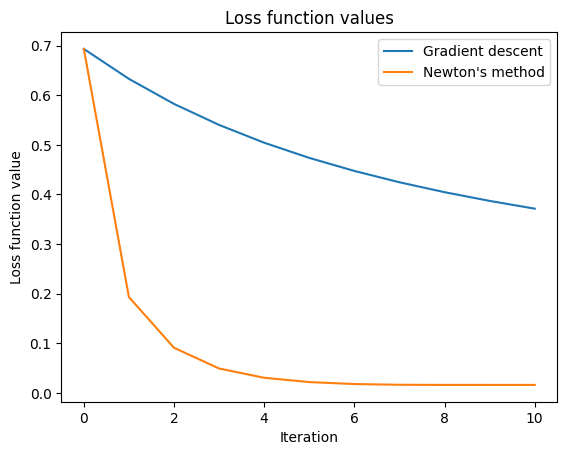

In [30]:
# plot newton method loss function values with gradient descent loss function values
plt.figure()
plt.plot(cost_history, label="Gradient descent")
plt.plot(cost_newton, label="Newton's method")
plt.title("Loss function values")
plt.xlabel("Iteration")
plt.ylabel("Loss function value")
plt.legend()
plt.show()



--------------------
quection 02

In [31]:
# load the data
import numpy as np
import matplotlib . pyplot as plt
from sklearn . datasets import fetch_openml
from sklearn . linear_model import LogisticRegression
from sklearn . model_selection import GridSearchCV , train_test_split
from sklearn . pipeline import Pipeline
from sklearn . preprocessing import StandardScaler
from sklearn . metrics import accuracy_score
from sklearn . utils import check_random_state

# data loading

train_samples = 500
X , y = fetch_openml ("mnist_784", version =1 , return_X_y = True ,as_frame = False )
random_state = check_random_state(0)
permutation = random_state.permutation ( X . shape [0])
X = X [ permutation ]
y = y [ permutation ]
print(X.shape )
X = X.reshape (( X . shape [0] , -1) )
print(X.shape)
X_train , X_test , y_train , y_test = train_test_split (X , y ,train_size = train_samples , test_size =100)


c:\python\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(70000, 784)
(70000, 784)


In [32]:
# Use lasso logistic regression and create a pipeline for scaling and classification
model = LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto')
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear', multi_class='auto'))
])
param_grid = [
    {'classifier__C': np.logspace(-2, 2, 9)}
]

In [34]:
# Use GridSearchCV to perform a grid search over the range
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# find the best parameters
print("Best parameters: {}".format(grid_search.best_params_))
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_


Best parameters: {'classifier__C': 0.31622776601683794}


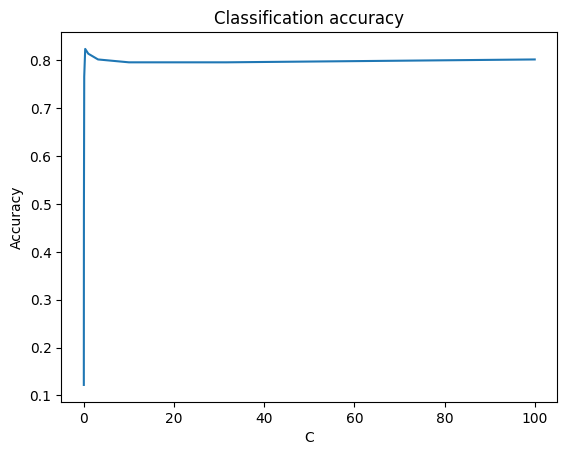

In [35]:
# Plot the classification accuracy with respect to hyperparameter C
plt.figure()
plt.plot(np.logspace(-2, 2, 9), grid_search.cv_results_['mean_test_score'])
plt.title("Classification accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()



Confusion matrix:
 [[ 6  0  0  0  0  1  0  0  1  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0]
 [ 0  1  0  0  8  0  0  0  0  2]
 [ 0  0  0  0  1  3  0  0  0  0]
 [ 0  0  0  0  1  0  8  0  0  0]
 [ 0  0  0  0  1  0  0 11  0  2]
 [ 0  0  0  0  1  0  0  0 11  0]
 [ 0  1  0  1  0  1  0  1  0 11]]
Precision: 0.8588888888888888
Recall: 0.85518759018759
F1-score: 0.8526539913624311


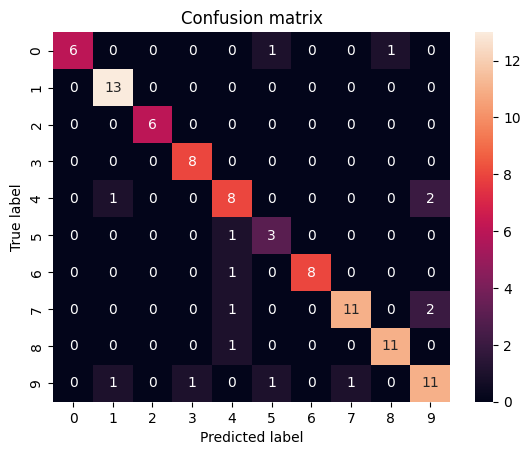

In [37]:
# Calculate confusion matrix, precision, recall and F1-score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
y_pred = best_model.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("Confusion matrix:\n", confusion)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# confusion matrix plot
import seaborn as sns
plt.figure()
sns.heatmap(confusion, annot=True, fmt='d')
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
